# 1. Importação das bibliotecas utilizadas

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 2. Exploração inicial dos dados

## 2.1. Carregamento dos dados

In [51]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [52]:
train_df.head(3)

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.849,9,...,1,0.0549,0.000058,0.056700,0.4640,0.320,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.190,7,...,0,0.0370,0.930000,0.000356,0.0834,0.133,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.509,1,...,1,0.0362,0.777000,0.202000,0.1150,0.544,90.459,3,idm,1


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

## 2.2. Identificação de valores nulos

In [54]:
train_df.isna().sum()

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64

### 2.2.1. Identificação de valores duplicados

In [55]:
train_df.duplicated().sum()

np.int64(0)

## 2.3. Aplicação de estatística descritiva

In [56]:
train_df.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


In [57]:
train_df['popularity_target'].value_counts()

popularity_target
0    40870
1    38930
Name: count, dtype: int64

## 2.4. Exploração de gráficos

### 2.4.1. Visualização de distribuição da coluna duration_ms

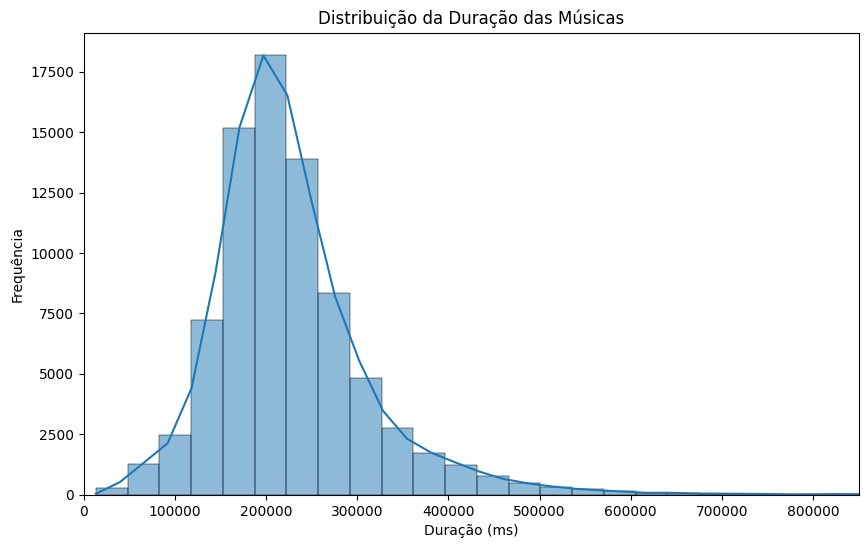

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['duration_ms'], bins=150, kde=True)
plt.title('Distribuição da Duração das Músicas')
plt.xlabel('Duração (ms)')
plt.ylabel('Frequência')
plt.xlim(0, 850000)  # Ajusta dos limites do eixo x
plt.show()


O gráfico aponta que a duração das músicas em milissegundos segue uma distribuição normal.

### 2.4.2. Visualização de distribuição da coluna danceability

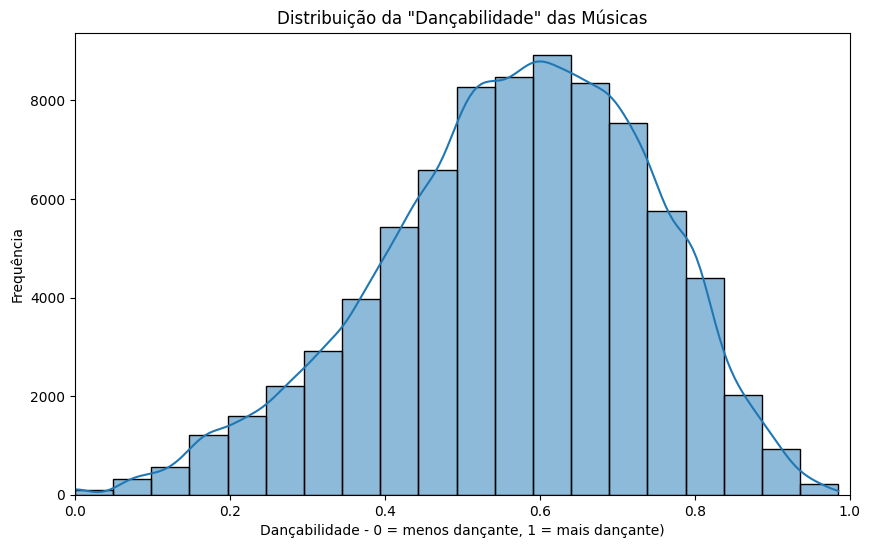

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['danceability'], bins=20, kde=True)
plt.title('Distribuição da "Dançabilidade" das Músicas')
plt.xlabel('Dançabilidade - 0 = menos dançante, 1 = mais dançante)')
plt.ylabel('Frequência')
plt.xlim(0, 1)  
plt.show()


O gráfico aponta que a dançabilidade das músicas segue uma distribuição normal.

### 2.4.3. Visualização de distribuição da coluna energy

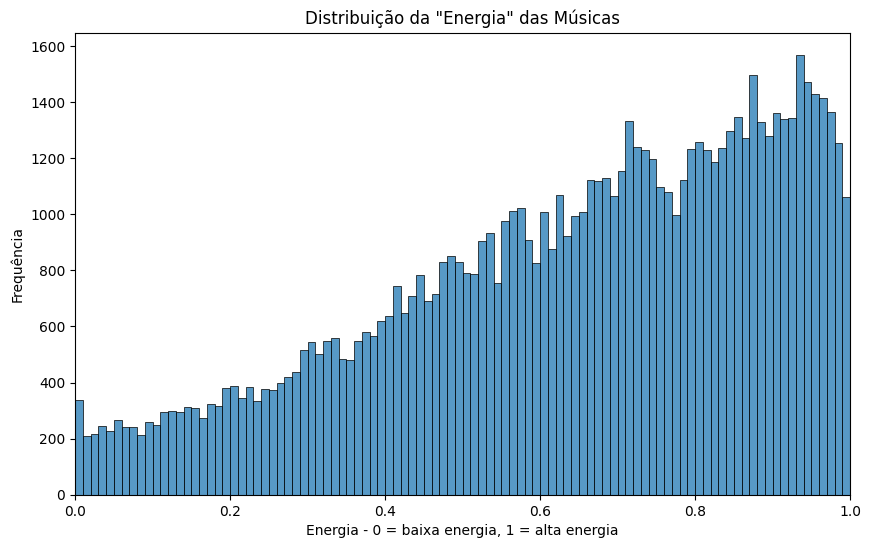

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['energy'], bins=100, kde=False)
plt.title('Distribuição da "Energia" das Músicas')
plt.xlabel('Energia - 0 = baixa energia, 1 = alta energia')
plt.ylabel('Frequência')
plt.xlim(0, 1)  
plt.show()


O gráfico aponta que a energia das músicas segue um formato crescente, onde a quantidade de músicas com maior energia é maior do que a quatidade de músicas com menor energia.

### 2.4.4. Visualização de distribuição da coluna key

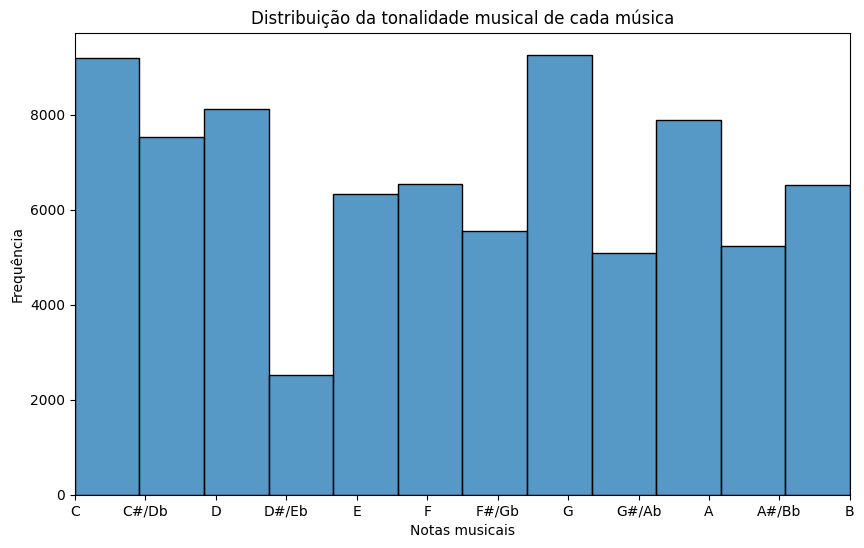

In [61]:
# Definindo os rótulos das notas musicais
notas = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']

plt.figure(figsize=(10, 6))
sns.histplot(train_df['key'], bins=12, kde=False)
plt.title('Distribuição da tonalidade musical de cada música')
plt.xlabel('Notas musicais')
plt.ylabel('Frequência')
plt.xlim(0, 11)

plt.xticks(ticks=range(12), labels=notas)

plt.show()


In [62]:
train_df['key'].value_counts()

key
7     9261
0     9183
2     8120
9     7893
1     7531
5     6549
11    6529
4     6340
6     5560
10    5233
8     5090
3     2511
Name: count, dtype: int64

Aqui, foi utilizada uma conversão de valor numérico para uma nota musical. Essa conversão é comum para músicos, onde 0 representa a nota Dó (C) e assim por diante, contando com notas de semitom como C#/Db. Com esse gráfico, percebemos que, com exceção da nota Ré Sustenido/Mi Bemol (D#/Eb), existe uma quantidade não muito discrepante de músicas com tons em diferentes notas musicais, sendo que tons em Sol e Dó são mais os mais comuns.

### 2.4.5. Visualização de distribuição da coluna acousticness

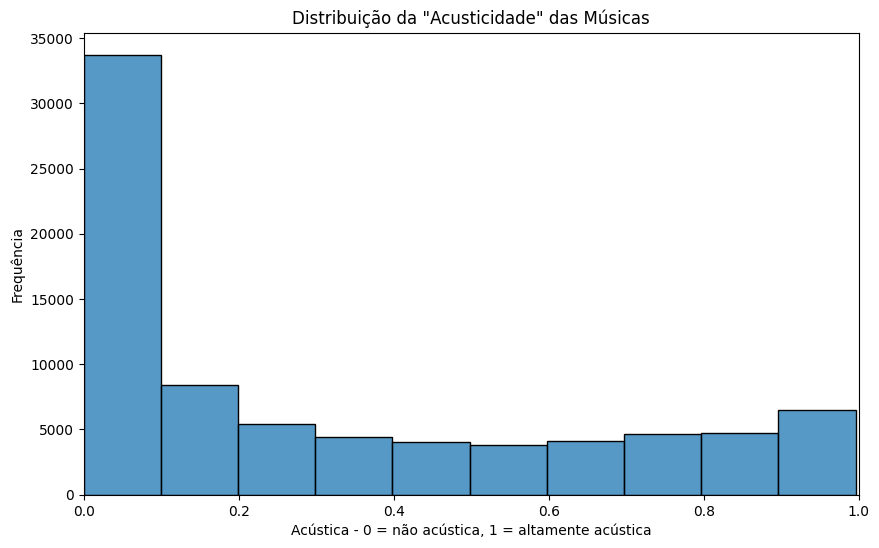

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['acousticness'], bins=10, kde=False)
plt.title('Distribuição da "Acusticidade" das Músicas')
plt.xlabel('Acústica - 0 = não acústica, 1 = altamente acústica')
plt.ylabel('Frequência')
plt.xlim(0, 1)  
plt.show()


### 2.4.6. Visualização de distribuição da coluna tempo

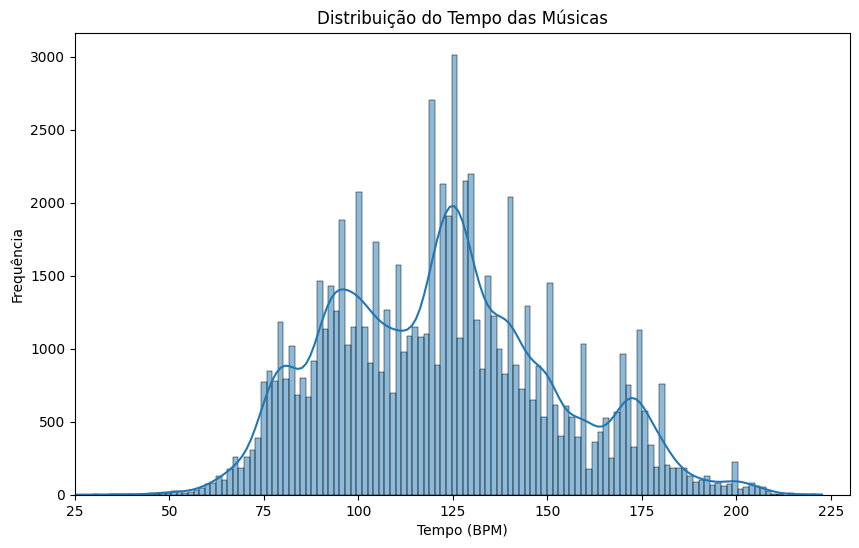

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['tempo'], bins=150, kde=True)
plt.title('Distribuição do Tempo das Músicas')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequência')
plt.xlim(25, 230)  
plt.show()


In [65]:
(train_df['tempo'] == 0).sum()

np.int64(99)

Aqui, descobrimos que a maior parte das faixas musicais possuem um BPM entre 100 e 150. Além disso, encontramos 99 faixas com BPM igual a 0, algo que teremos que tratar no futuro.

### 2.4.7. Visualização de distribuição da coluna time_signature

In [66]:
train_df['time_signature'].value_counts()

time_signature
4    71202
3     6512
5     1274
1      710
0      102
Name: count, dtype: int64

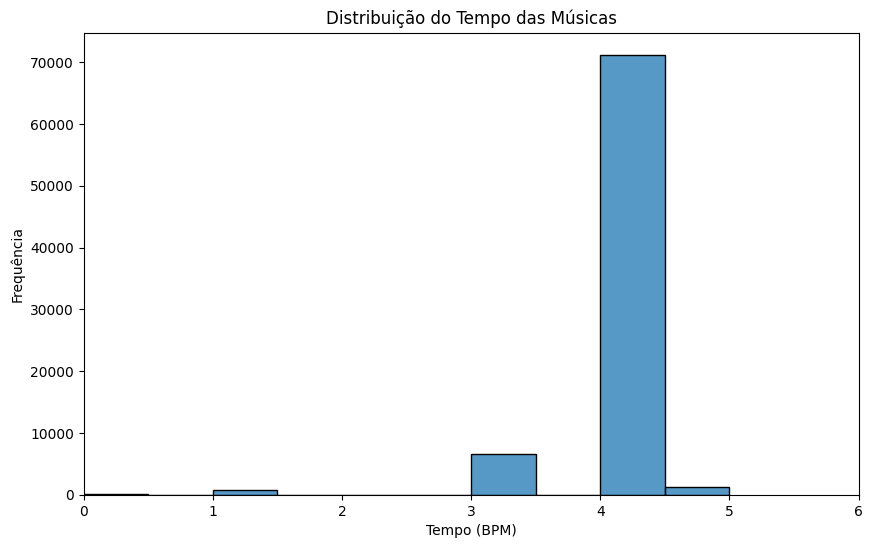

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['time_signature'], bins=10, kde=False)
plt.title('Distribuição do Tempo das Músicas')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequência')
plt.xlim(0, 6)  
plt.show()


Aqui, identificamos que a grande maioria das músicas segue uma assinatura de tempo de 4/4, o que realmente é o mais comum no meio musical. Além disso, identificamos que não existem músicas com assinatura de tempo igual a 2, porém existem músicas com assinatura igual a 0. A assinatura igual a 0 não deveria existir. Portanto, é possível interpretar que todas aquelas que possuem assinatura igual a 0 podem ser consideradas como 2. 

### 2.4.8. Visualização da distribuição da coluna loudness

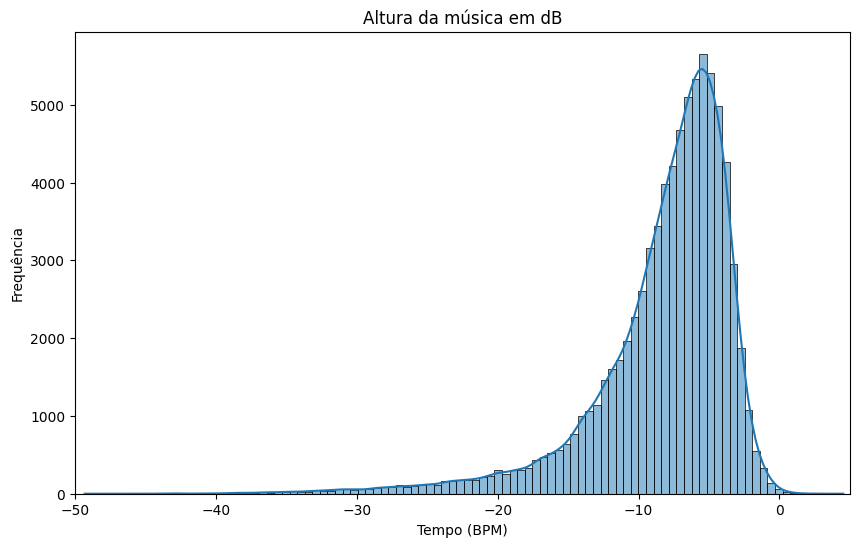

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['loudness'], bins=100, kde=True)
plt.title('Altura da música em dB')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequência')
plt.xlim(-50, 5)  
plt.show()


In [69]:
train_df['loudness'].describe()

count    79800.000000
mean        -8.263741
std          5.035504
min        -49.307000
25%        -10.006000
50%         -7.012000
75%         -5.000000
max          4.532000
Name: loudness, dtype: float64

A partir deste gráfico e da estatística descritiva, é possível notar que a coluna de altura representa uma distribuição normal. Além disso, valores mínimos e máximos parecem sugerir possíveis outliers.

# 3. Pré-Processamento dos dados

Como não foram identificados valores nulos ou duplicados, não é necessário realizar tal remoção

## 3.1. Encodificação de colunas categóricas

Foram encontradas as seguintes colunas categóricas:

| Column      | Non-null Count | Data Type |
|-------------|----------------|-----------|
| track_id    | 79800          | object    |
| artists     | 79800          | object    |
| album_name  | 79800          | object    |
| track_name  | 79800          | object    |
| track_genre | 79800          | object    |


Dessas, podemos descartar a conversão do track_id, uma vez que esta já possui uma conversão para inteiro na coluna track_unique_id. Além disso, acreditamos que colunas como track_name e album_name terão pouca influência sobre a popularidade de uma música. Dessa forma, as duas colunas que precisam ser encodificadas para valores numéricos são artists e track_genre.

In [70]:
train_df['track_genre'].nunique()

114

In [71]:
train_df['artists'].nunique()

25775

Como podemos ver, a quantidade de valores únicos para track_genre é de 114, e para artists é de 25775. Dessa forma, é necessário aplicar métodos de encodificação diferentes para cada coluna. Por exemplo, aplicar o One Hot Encoding na coluna artists resultaria na criação de 25775 novas colunas, o que aumenta tragicamente a dimensionalidade do dataframe. <br>
Dessa forma, foi decidico que a coluna track_genre seria encodificada com Label Encoding. Já a coluna de artistas será encodificada com Target Encoding.

### 3.1.1. Encodificação Label da coluna track_genre

A encodificação Label consiste em substituir cada valor único por um número inteiro.

In [72]:
label_encoder = LabelEncoder()
train_df['track_genre_encoded'] = label_encoder.fit_transform(train_df['track_genre'])

### 3.1.2. Encodificação Target da coluna artists

A encodificação Target consiste em substituir os valores categóricos pelas médias de valores da variável alvo (popularity_target) associada a cada categoria. Ou seja, analisamos a média de popularidade de cada artista e então utilizamos esse valor para representar a coluna de artistas.

In [73]:
## Cálculo da média de popularidade para cada artista
artists_mean_target = train_df.groupby('artists')['popularity_target'].mean()
## Troca cada artista pelo valor médio de popularidade
train_df['artists_encoded'] = train_df['artists'].map(artists_mean_target)
## Média geral do target
overall_mean_target = train_df['popularity_target'].mean()
## Remove valores nulos e substitui pela média global
train_df['artists_encoded'] = train_df['artists_encoded'].fillna(overall_mean_target)



### 3.1.3. Visualização dos dados encodificados

Após termos realizado toda a encodificação, podemos visualizar como os dados ficaram:

In [74]:
train_df[['artists_encoded', 'track_genre_encoded']].head(10)

,artists_encoded,track_genre_encoded
0,0.000000,41
1,0.000000,76
2,0.294118,54
3,0.000000,16
4,0.059829,109
5,1.000000,80
6,1.000000,0
7,0.121212,105
8,0.000000,105
9,0.000000,110


In [75]:
(train_df['artists_encoded'] == 0).value_counts()

artists_encoded
False    55403
True     24397
Name: count, dtype: int64

## 3.2. Identificação e tratamento de outliers

### 3.2.1. Indentificação

#### 3.2.1.1. Músicas com duração elevada

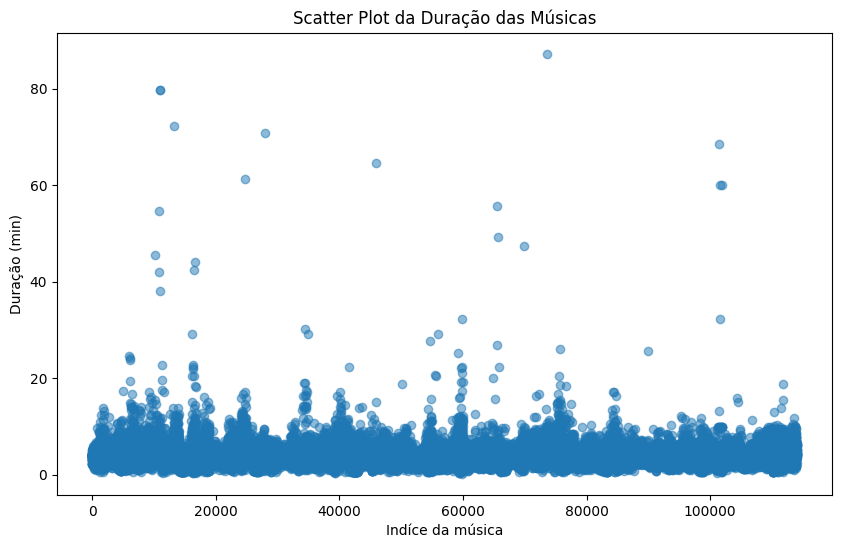

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['track_unique_id'], train_df['duration_ms']/60000, alpha=0.5)
plt.title('Scatter Plot da Duração das Músicas')
plt.xlabel('Indíce da música')
plt.ylabel('Duração (min)')
plt.show()

In [77]:
# Converter a duração de milissegundos para minutos e filtrar as músicas com duração maior ou igual a 68 minutos
long_duration_songs_68_minutes = train_df[train_df['duration_ms'] >= 68 * 60 * 1000]

print((long_duration_songs_68_minutes['popularity_target'] == 1).value_counts())

print('-----------------------------------')

long_duration_songs_69_minutes = train_df[train_df['duration_ms'] >= 69 * 60 * 1000]
print((long_duration_songs_69_minutes['popularity_target'] == 1).value_counts())

popularity_target
False    5
True     1
Name: count, dtype: int64
-----------------------------------
popularity_target
False    5
Name: count, dtype: int64


#### 3.2.1.2. Altura da música


In [78]:
train_df['loudness'].describe()

count    79800.000000
mean        -8.263741
std          5.035504
min        -49.307000
25%        -10.006000
50%         -7.012000
75%         -5.000000
max          4.532000
Name: loudness, dtype: float64

In [79]:
## Calcula o z-score para a coluna 'loudness'
train_df['z_score_loudness'] = stats.zscore(train_df['loudness'])

train_df[['loudness', 'z_score_loudness']].head()

,loudness,z_score_loudness
0,-10.795,-0.502686
1,-12.030,-0.747946
2,-9.661,-0.277483
3,-23.149,-2.956080
4,-7.294,0.192582


In [80]:
train_df[train_df['z_score_loudness'] <= -6]['loudness']

326     -39.154
437     -42.864
6574    -40.225
8232    -40.795
11210   -39.346
12321   -39.053
12546   -38.528
15089   -43.957
17972   -46.591
18951   -40.558
20886   -43.046
21593   -43.043
23816   -38.523
25513   -38.781
31906   -42.995
34031   -38.780
34081   -43.303
35371   -42.864
39240   -40.606
40694   -43.943
44490   -40.558
44775   -42.864
44929   -41.739
45443   -38.577
46002   -43.504
48327   -38.615
51012   -38.574
51042   -42.631
52469   -41.531
54030   -40.264
54313   -39.193
59453   -49.307
61544   -39.346
66763   -40.112
67103   -38.615
67601   -39.627
68528   -38.781
71105   -38.928
72767   -41.808
73568   -40.843
74761   -43.714
75020   -39.219
78729   -39.869
Name: loudness, dtype: float64

Assim, identificamos que valores próximos ou menores do que -40 para a coluna loudness represetam um z-score próximo a 6 desvios padrões. Dessa forma, será feita a remoção destes dados como outliers.

### 3.2.2. Tratamento

#### 3.2.2.1. Remoção de outliers de música do alta duração

A partir desta análise, percebemos que existe uma grande quantidade de músicas no dataset que possuem uma duração, em minutos, superior, por exemplo, a 10 minutos. Realizando a análise mais detalhada, percebemos que apenas músicas que vão até 68 minutos de duração possuem algum exemplar com popularity_target igual a 1. Dessa forma, foi decidida a remoção de músicas com duração, em minutos, superior a 68 minutos.

In [81]:
## Remover as linhas em que a duração da música é maior que 68 minutos
train_df = train_df[train_df['duration_ms'] < 69 * 60 * 1000]

Criação de uma coluna com a duração das músicas em minutos

In [82]:
train_df['duration_min'] = (train_df['duration_ms'] / 60000).round(2)

In [83]:
train_df['duration_min'].describe()

count    79795.000000
mean         3.793691
std          1.648908
min          0.220000
25%          2.910000
50%          3.550000
75%          4.360000
max         68.670000
Name: duration_min, dtype: float64

Como podemos ver, valores maiores, como 68 minutos, ainda assim não são capazes de puxar a média para valores incorretos. Dessa forma, identificamos que tais valores ainda podem ser úteis e decidimos os manter para a análise.

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79795 entries, 0 to 79799
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_unique_id      79795 non-null  int64  
 1   track_id             79795 non-null  object 
 2   artists              79795 non-null  object 
 3   album_name           79795 non-null  object 
 4   track_name           79795 non-null  object 
 5   duration_ms          79795 non-null  int64  
 6   explicit             79795 non-null  bool   
 7   danceability         79795 non-null  float64
 8   energy               79795 non-null  float64
 9   key                  79795 non-null  int64  
 10  loudness             79795 non-null  float64
 11  mode                 79795 non-null  int64  
 12  speechiness          79795 non-null  float64
 13  acousticness         79795 non-null  float64
 14  instrumentalness     79795 non-null  float64
 15  liveness             79795 non-null  floa

#### 3.2.2.2. Remoção de outliers com altura de música muito baixa

Para o tratamento de outliers na coluna loudness, temos:

In [85]:
train_df = train_df[train_df['z_score_loudness'] > -6]

In [86]:
train_df['loudness'].describe()

count    79752.000000
mean        -8.245923
std          4.978716
min        -38.463000
25%        -10.002000
50%         -7.010000
75%         -4.998750
max          4.532000
Name: loudness, dtype: float64

# 4. Formulação e testes de hipóteses

## 4.1. Hipótese 1: Músicas do gênero Pop são aquelas que possuem maior quantidade de músicas populares

A hipótese consiste em afirmar que músicas que possuam como track_genre o pop serão aquelas que possuirão uma contagem maior de músicas que são populares (popularity_target == 1)

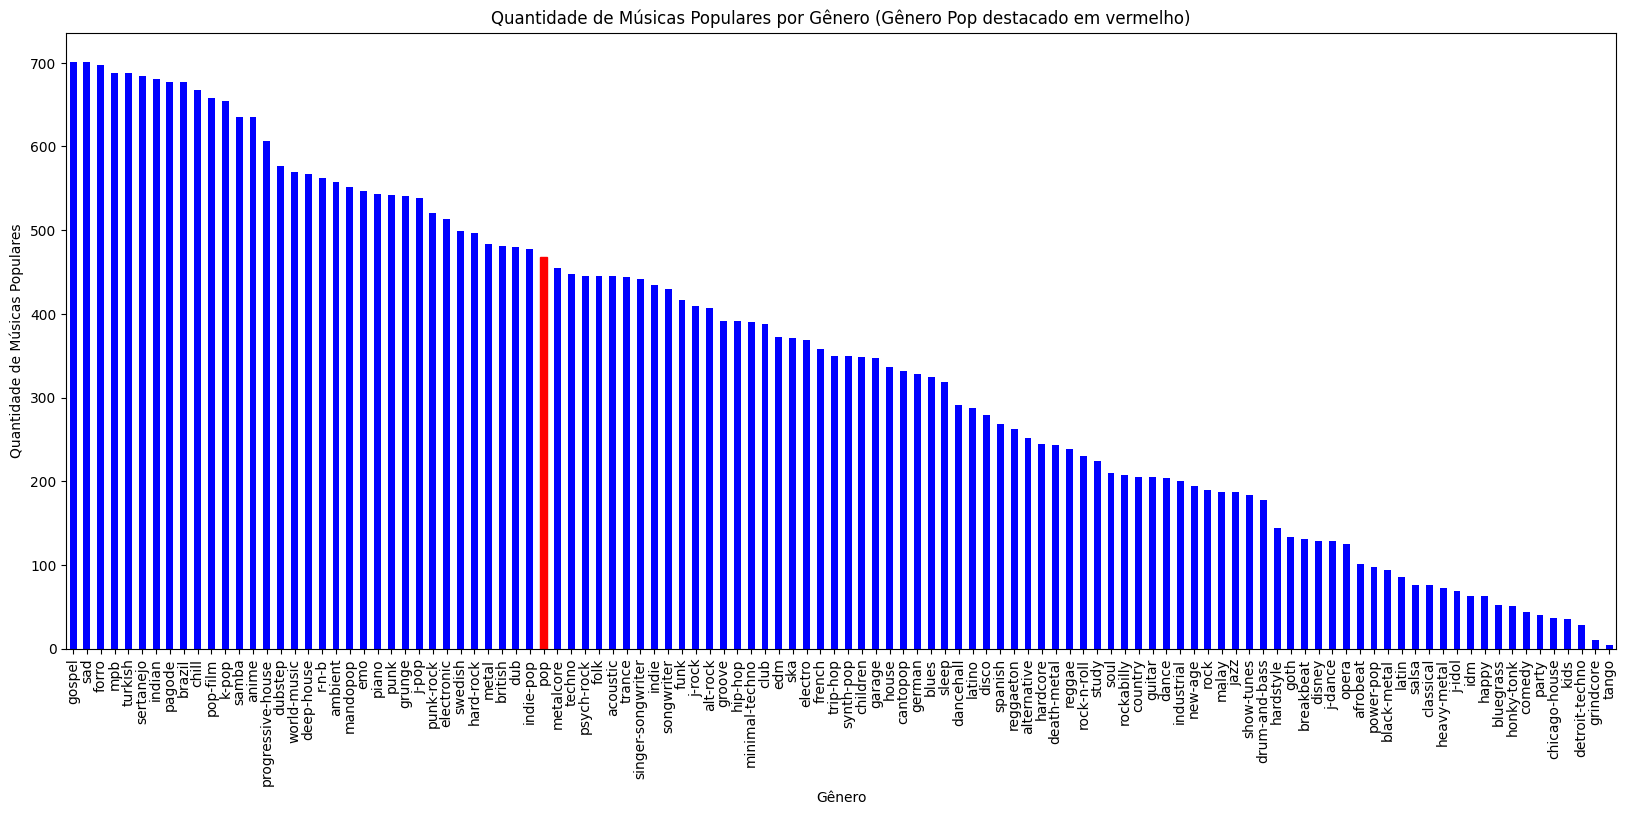

In [87]:
popular_songs_by_genre = train_df[train_df['popularity_target'] == 1]['track_genre'].value_counts()

plt.figure(figsize=(20, 8))
ax = popular_songs_by_genre.plot(kind='bar', color='blue')

# Destacar a barra do gênero pop  
for i, genre in enumerate(popular_songs_by_genre.index):
    if genre == 'pop':
        ax.patches[i].set_color('red')

plt.title('Quantidade de Músicas Populares por Gênero (Gênero Pop destacado em vermelho)')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Músicas Populares')
plt.show()


Como o gráfico mostra, o gênero que possui a maior quantidade de músicas como populares é, na verdade, o gospel, seguido de gêneros como sad, forro, mpb e turkish. Dessa forma, a hipótese inicial é refutada, de modo que, como pode-se notar no gráfico, o gênero pop se mantém na posição nº 35 em popularidade.

## 4.2. Hipótese 2: Músicas populares possuem duração semelhante

Esta hipótese afirma que, pelo menos em maioria dos casos, as músicas que possuem popularity_target igual a 1 possuem também uma duração que deve estar em torno de 2 a 6 minutos.

In [88]:
train_df[train_df['popularity_target'] == 1]['duration_min'].describe()

count    38909.000000
mean         3.796629
std          1.488011
min          0.510000
25%          2.980000
50%          3.580000
75%          4.330000
max         68.670000
Name: duration_min, dtype: float64

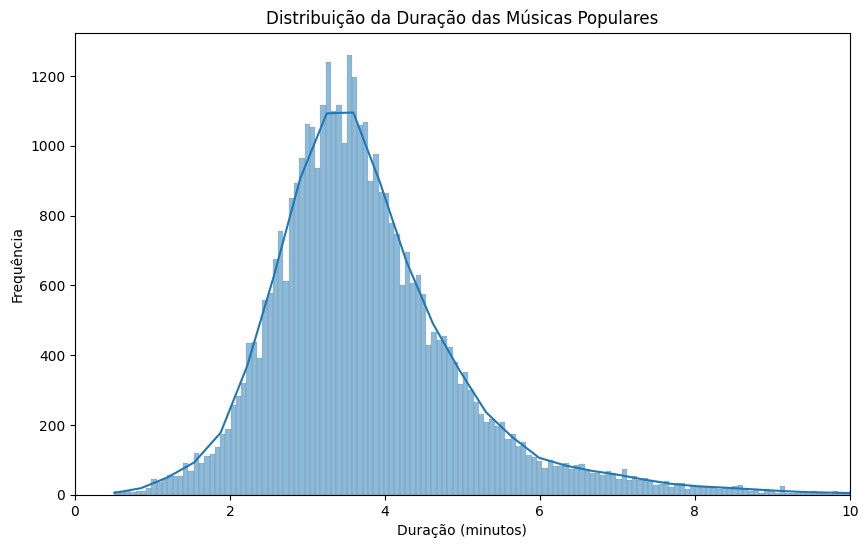

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['popularity_target'] == 1]['duration_min'], bins=1000, kde=True)
plt.title('Distribuição da Duração das Músicas Populares')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.xlim(0, 10)
plt.show()

A partir da estatística descritiva, podemos confirmar a hipótese, uma vez que a grande maioria das músicas populares se mantém numa média de 3.7 minutos e entre 2 e 6 minutos.

## 4.3. Hipótese 3: Músicas mais dançantes são mais populares

Esta hipótese afirma que músicas com maior coeficiente de dançabilidade serão mais populares, uma vez que músicas desse tipo são mais contagiantes e reproduzidas.

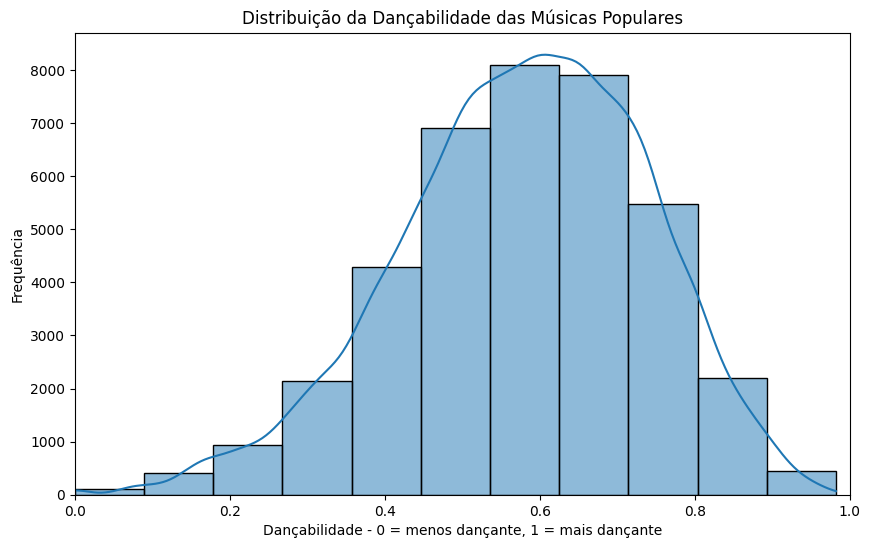

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['popularity_target'] == 1]['danceability'], bins=11, kde=True)
plt.title('Distribuição da Dançabilidade das Músicas Populares')
plt.xlabel('Dançabilidade - 0 = menos dançante, 1 = mais dançante')
plt.ylabel('Frequência')
plt.xlim(0, 1)
plt.show()

De acordo com o gráfico, vemos que a hipótese se mostra não verdadeira, uma vez que, na verdade, as músicas que possuem um coeficiente de dançabilidade entre 0.5 e 0.7 são mais populares entre os ouvintes. Dessa forma, não podemos afirmar que uma música extremamente dançante será popular. Entretanto, pouquíssimas músicas com dançabilidade muito baixa são populares. Dessa forma, pode-se afirmar que um coeficiente de dançabilidade baixo influencia diretamente se uma música é impopular.

## 4.4. Hipótese 4: Músicas sem conteúdo explícito são mais populares

Para esta hipótese, entende-se que músicas sem conteúdo explícito, ou seja, que não falem palavras de baixo calão ou de cunho sexual serão mais populares entre os ouvintes.

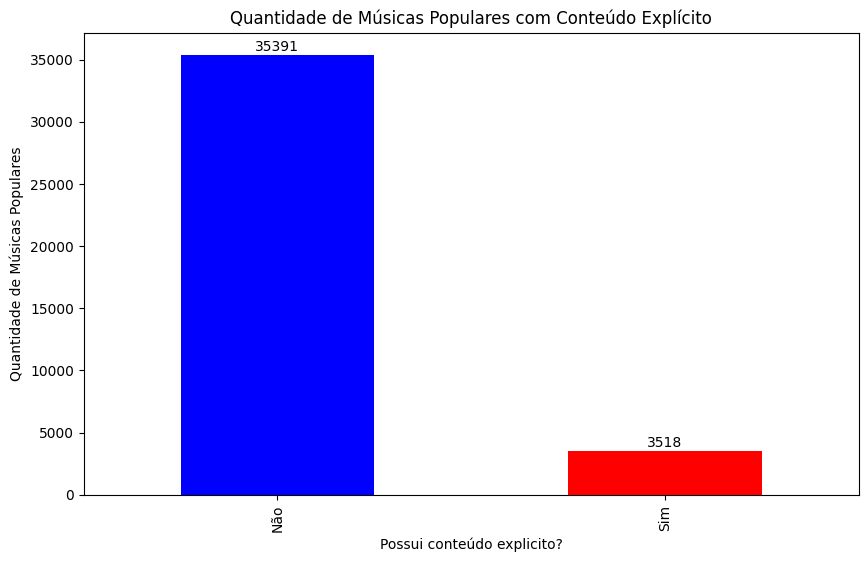

In [91]:
popular_explicit_counts = train_df[train_df['popularity_target'] == 1]['explicit'].value_counts()

plt.figure(figsize=(10, 6))
ax = popular_explicit_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Quantidade de Músicas Populares com Conteúdo Explícito')
plt.xlabel('Possui conteúdo explicito?')
plt.ylabel('Quantidade de Músicas Populares')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])

# Adiciona a quantidade de músicas populares acima das barras
for i, count in enumerate(popular_explicit_counts):
    ax.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

A partir do gráfico plotado, percebemos que a hipótese se mostra verdadeira, uma vez que cerca de 10x mais músicas populares não possuem conteúdo explícito. 

# 5. Escolha das features

&nbsp;&nbsp;&nbsp;&nbsp;Nesta seção, será realizada a escolha das features que serão utilizadas pelo modelo. A escolha será feita com base em algoritmos que determinam quais features possuem maior impacto no valor target (popularidade). Ou seja, um algoritmo irá calcular quais métricas são mais responsáveis por dizer se uma música é popular ou não. A partir disso, podemos descartar aquelas que possuem pouca relevância, diminuindo assim a dimensionalidade do nosso modelo. 

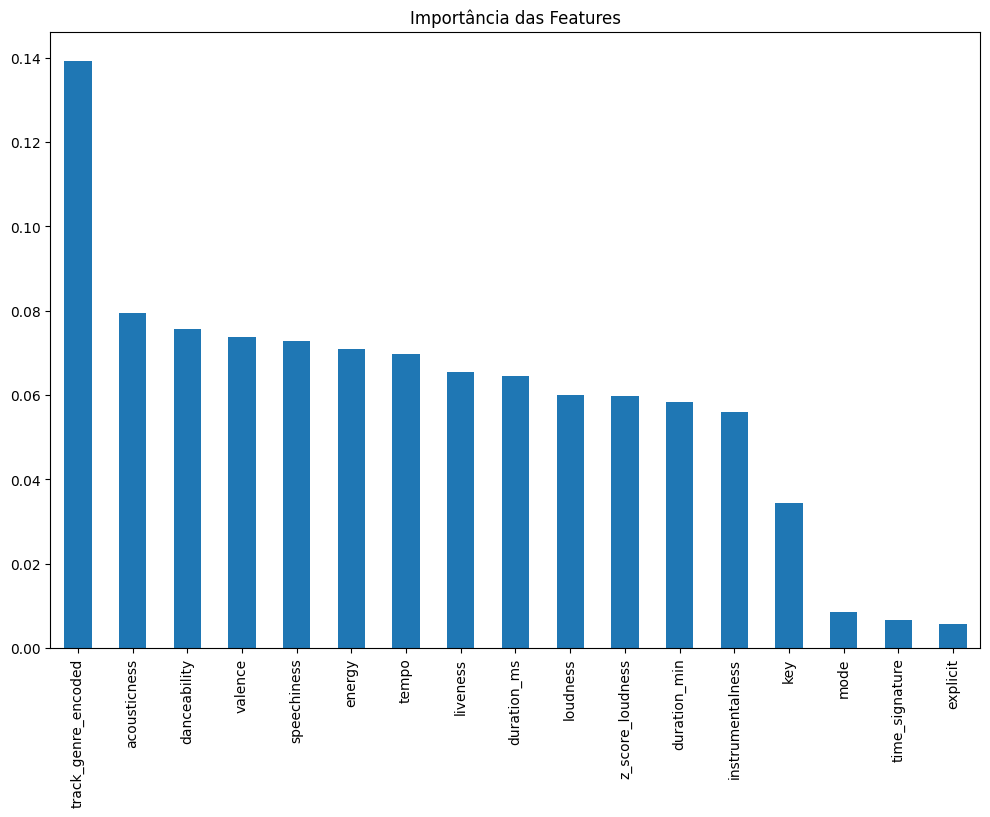

track_genre_encoded    0.139127
acousticness           0.079422
danceability           0.075647
valence                0.073651
speechiness            0.072732
energy                 0.070926
tempo                  0.069635
liveness               0.065432
duration_ms            0.064434
loudness               0.059935
z_score_loudness       0.059780
duration_min           0.058399
instrumentalness       0.055876
key                    0.034355
mode                   0.008512
time_signature         0.006548
explicit               0.005588
dtype: float64


In [92]:
## Define as features e a coluna alvo (popularidade)
X = train_df.drop(columns=['popularity_target', 'track_unique_id', 'track_id', 'track_name', 'album_name', 'artists', 'track_genre', 'artists_encoded'])
y = train_df['popularity_target']

## Treina um modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Importância das Features')
plt.show()

print(feature_importances)


In [102]:
features_to_drop = feature_importances[feature_importances < 0.06].index
train_df.drop(columns=features_to_drop, inplace=True)
X.drop(columns=features_to_drop, inplace=True)

# 6. Escolha de modelo

&nbsp;&nbsp;&nbsp;&nbsp;Aqui, rodaremos 2 diferentes simples modelos de aprendizagem-supervisionada, a fim de entender qual deles tem maior potencial de realizar previsões corretas.

## 6.1. Logistic Regression

&nbsp;&nbsp;&nbsp;&nbsp;Modelos de regressão logística são simples e rápidos, muito utilizado para problemas de classificação binária (nosso caso). Ele prevê a probabilidade de determinado evento ocorrer, ou seja, a probabilidade de uma música ser ou não popular neste contexto. No geral, é um modelo fácil de interpretar e muito utilizado por sua simplicidade.

In [103]:
## Divide dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


              precision    recall  f1-score   support

           0       0.57      0.61      0.59      8165
           1       0.56      0.51      0.53      7786

    accuracy                           0.56     15951
   macro avg       0.56      0.56      0.56     15951
weighted avg       0.56      0.56      0.56     15951

Accuracy: 0.562221804275594


## 6.2. Random Forest

&nbsp;&nbsp;&nbsp;&nbsp;Modelos de random forest são baseados em árvores de decisão. Durante o treinamento, cada árvore possuirá um subconjunto aleatório de dados e seleção também aleatória de features. Para fazer uma classificação, o modelo vê os resultados de todas as árvores e então escolhe o resultado "mais votado". 

In [104]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8165
           1       0.80      0.81      0.80      7786

    accuracy                           0.81     15951
   macro avg       0.81      0.81      0.81     15951
weighted avg       0.81      0.81      0.81     15951

Accuracy: 0.8077236536894239


&nbsp;&nbsp;&nbsp;&nbsp;Com base na precisão, o modelo escolhido foi o de Random Forest, com uma acurácia de cerca de 80,4%.

# 7. Finetuning de Hiperparâmetros

&nbsp;&nbsp;&nbsp;&nbsp;Para realizar o ajuste de hiperparâmetros, iremos utilizar um algoritmo de Grid Search, que consiste, basicamente, em testar todas as combinações possíveis de parâmetros e encontrar aquela que retorne os melhores resultados, por exemplo, de acurácia. 

&nbsp;&nbsp;&nbsp;&nbsp;Os hiperparâmetros definidos para a finetuning foram:
- ```n_estimators```: Número de árvores na floresta
- ```max_depth```: Profundidade máxima das árvores
- ```min_samples_split```: Número mínimo de amostras necessárias para dividir um nó
- ```min_samples_leaf```: Número mínimo de amostras que devem estar em um nó folha
- ```max_features```: Número máximo de features a serem consideradas ao procurar a melhor divisão
- ```bootstrap```: Se o bootstrap (amostragem com reposição) é usado ao construir as árvores. Se False, toda a amostra é usada para construir as árvores.

In [105]:
#from sklearn.model_selection import GridSearchCV

## Define a grade de parâmetros
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

## Instancia o modelo apenas com random_state
#model = RandomForestClassifier(random_state=42)

## Configuração do GridSearch
## cv=5: 5-fold cross-validation
## n_jobs=-1: Utiliza todos os núcleos do processador
## verbose=2: Exibe mensagens de progresso
## scoring='accuracy': Usa a acurácia como métrica de avaliação
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#grid_search.fit(X_train, y_train)

## Melhor combinação de parâmetros encontrados
#print(f'Best Parameters: {grid_search.best_params_}')

## Realiza previsões com o modelo ajustado
#y_pred = grid_search.best_estimator_.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


&nbsp;&nbsp;&nbsp;&nbsp;Após rodar o algoritmo, recebemos que a melhor combinação de hiperparâmetros é: Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}. Accuracy: 0.8081624976490502

O código foi comentado por conta de seu tempo de execução muito longo. 

In [106]:
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

## 7.1. Modelo com hiperparâmetros ajustados

In [107]:
model = RandomForestClassifier(**best_params, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      8165
           1       0.80      0.81      0.81      7786

    accuracy                           0.81     15951
   macro avg       0.81      0.81      0.81     15951
weighted avg       0.81      0.81      0.81     15951

Accuracy: 0.8100432574760204


&nbsp;&nbsp;&nbsp;&nbsp;Após ajustar os hiperparâmetros, foi possível ver um aumento praticamente insignificante na acurácia do modelo. 

# 8. Produzindo arquivo para submissão

&nbsp;&nbsp;&nbsp;&nbsp;Aqui, rodaremos o modelo para os dados de teste, que não possuem rótulos, e vamos rotulá-los.

In [110]:
submission_df = pd.read_csv('test.csv')
submission_df['track_genre_encoded'] = label_encoder.fit_transform(submission_df['track_genre'])

In [114]:
# Garantir que o dataframe contenha as mesmas features usadas para treinar o modelo
X_submission = submission_df[['duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo', 'track_genre_encoded']]

popularity_predictions = model.predict(X_submission)

submission_output = pd.DataFrame({
    'track_unique_id': submission_df['track_unique_id'],
    'popularity_target': popularity_predictions
})

submission_output.to_csv('submission.csv', index=False)

print("Arquivo 'submission.csv' gerado com sucesso!")


Arquivo 'submission.csv' gerado com sucesso!
